#### Part 6 Replace ReLU activation with Sigmoid in CNN



In [2]:
import numpy as np
import keras
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
def resizing(mnist):
     train_data = []
     for img in mnist:
            resized_img = cv2.resize(img, (32, 32))
            train_data.append(resized_img)
     return train_data
newX_train = np.array(resizing(X_train))
newX_test = np.array(resizing(X_test))

In [4]:
from keras import backend
if keras.backend.image_data_format() == 'channels_first':
  newX_train = newX_train.reshape(len(newX_train), 1, 32, 32)
  newX_test = newX_test.reshape(len(newX_test), 1, 32, 32)
  input_shape = (1, 32, 32)
else:
  newX_train = newX_train.reshape(len(newX_train), 32, 32, 1)
  newX_test = newX_test.reshape(len(newX_test), 32, 32, 1)
  input_shape = (32, 32, 1)

In [5]:
from keras.utils import np_utils
newX_train = newX_train.astype('float32')
newX_train /= 255
newX_test = newX_test.astype('float32')
newX_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(Y_test, 10)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(Conv2D(256, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(Conv2D(512, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(Conv2D(512, (3, 3), activation='sigmoid', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Flatten()) 
model.add(Dense(4096, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         5

In [8]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [10]:
history = model.fit(newX_train[:6000], Y_train[:6000], batch_size=32, validation_data=(newX_test[:1000],Y_test[:1000]), epochs=10, verbose=1)
score = model.evaluate(newX_test[:1000], Y_test[:1000], batch_size=32)

Epoch 1/10
188/188 [==============================] - 380s 2s/step - loss: 2.4257 - accuracy: 0.1032 - val_loss: 2.3298 - val_accuracy: 0.0850
Epoch 2/10
188/188 [==============================] - 388s 2s/step - loss: 2.3614 - accuracy: 0.0982 - val_loss: 2.3160 - val_accuracy: 0.1260
Epoch 3/10
188/188 [==============================] - 379s 2s/step - loss: 2.3292 - accuracy: 0.1013 - val_loss: 2.3162 - val_accuracy: 0.0890
Epoch 4/10
188/188 [==============================] - 372s 2s/step - loss: 2.3183 - accuracy: 0.1107 - val_loss: 2.3031 - val_accuracy: 0.1100
Epoch 5/10
188/188 [==============================] - 370s 2s/step - loss: 2.3156 - accuracy: 0.1008 - val_loss: 2.3139 - val_accuracy: 0.0940
Epoch 6/10
188/188 [==============================] - 368s 2s/step - loss: 2.3124 - accuracy: 0.1058 - val_loss: 2.3002 - val_accuracy: 0.0990
Epoch 7/10
188/188 [==============================] - 364s 2s/step - loss: 2.3076 - accuracy: 0.1098 - val_loss: 2.3017 - val_accuracy: 0.1260

#### Inspect the training process

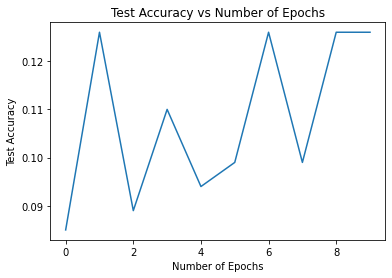

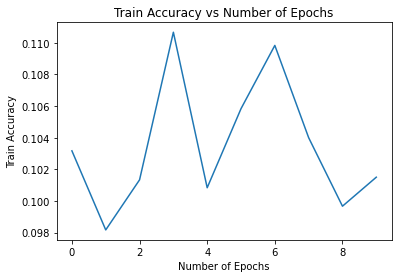

In [11]:
# (i) test accuracy vs the number of epochs (say 3 ∼ 5)
plt.plot(history.history['val_accuracy'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (ii) training accuracy vs the number of epochs
plt.plot(history.history['accuracy'])
plt.title('Train Accuracy vs Number of Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

#### Obviously, accuracies greatly decreased compared to accuracies in Ex1.2. This is due to gradient varnishing.

In [12]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('A3E1_6.ipynb')

--2022-03-03 06:18:16--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-03-03 06:18:16 (30.5 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/A3E1_6.ipynb to pdf
[NbConvertApp] Support files will be in A3E1_6_files/
[NbConvertApp] Making directory ./A3E1_6_files
[NbConvertApp] Making directory ./A3E1_6_files
[NbConvertApp] Writing 40348 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'